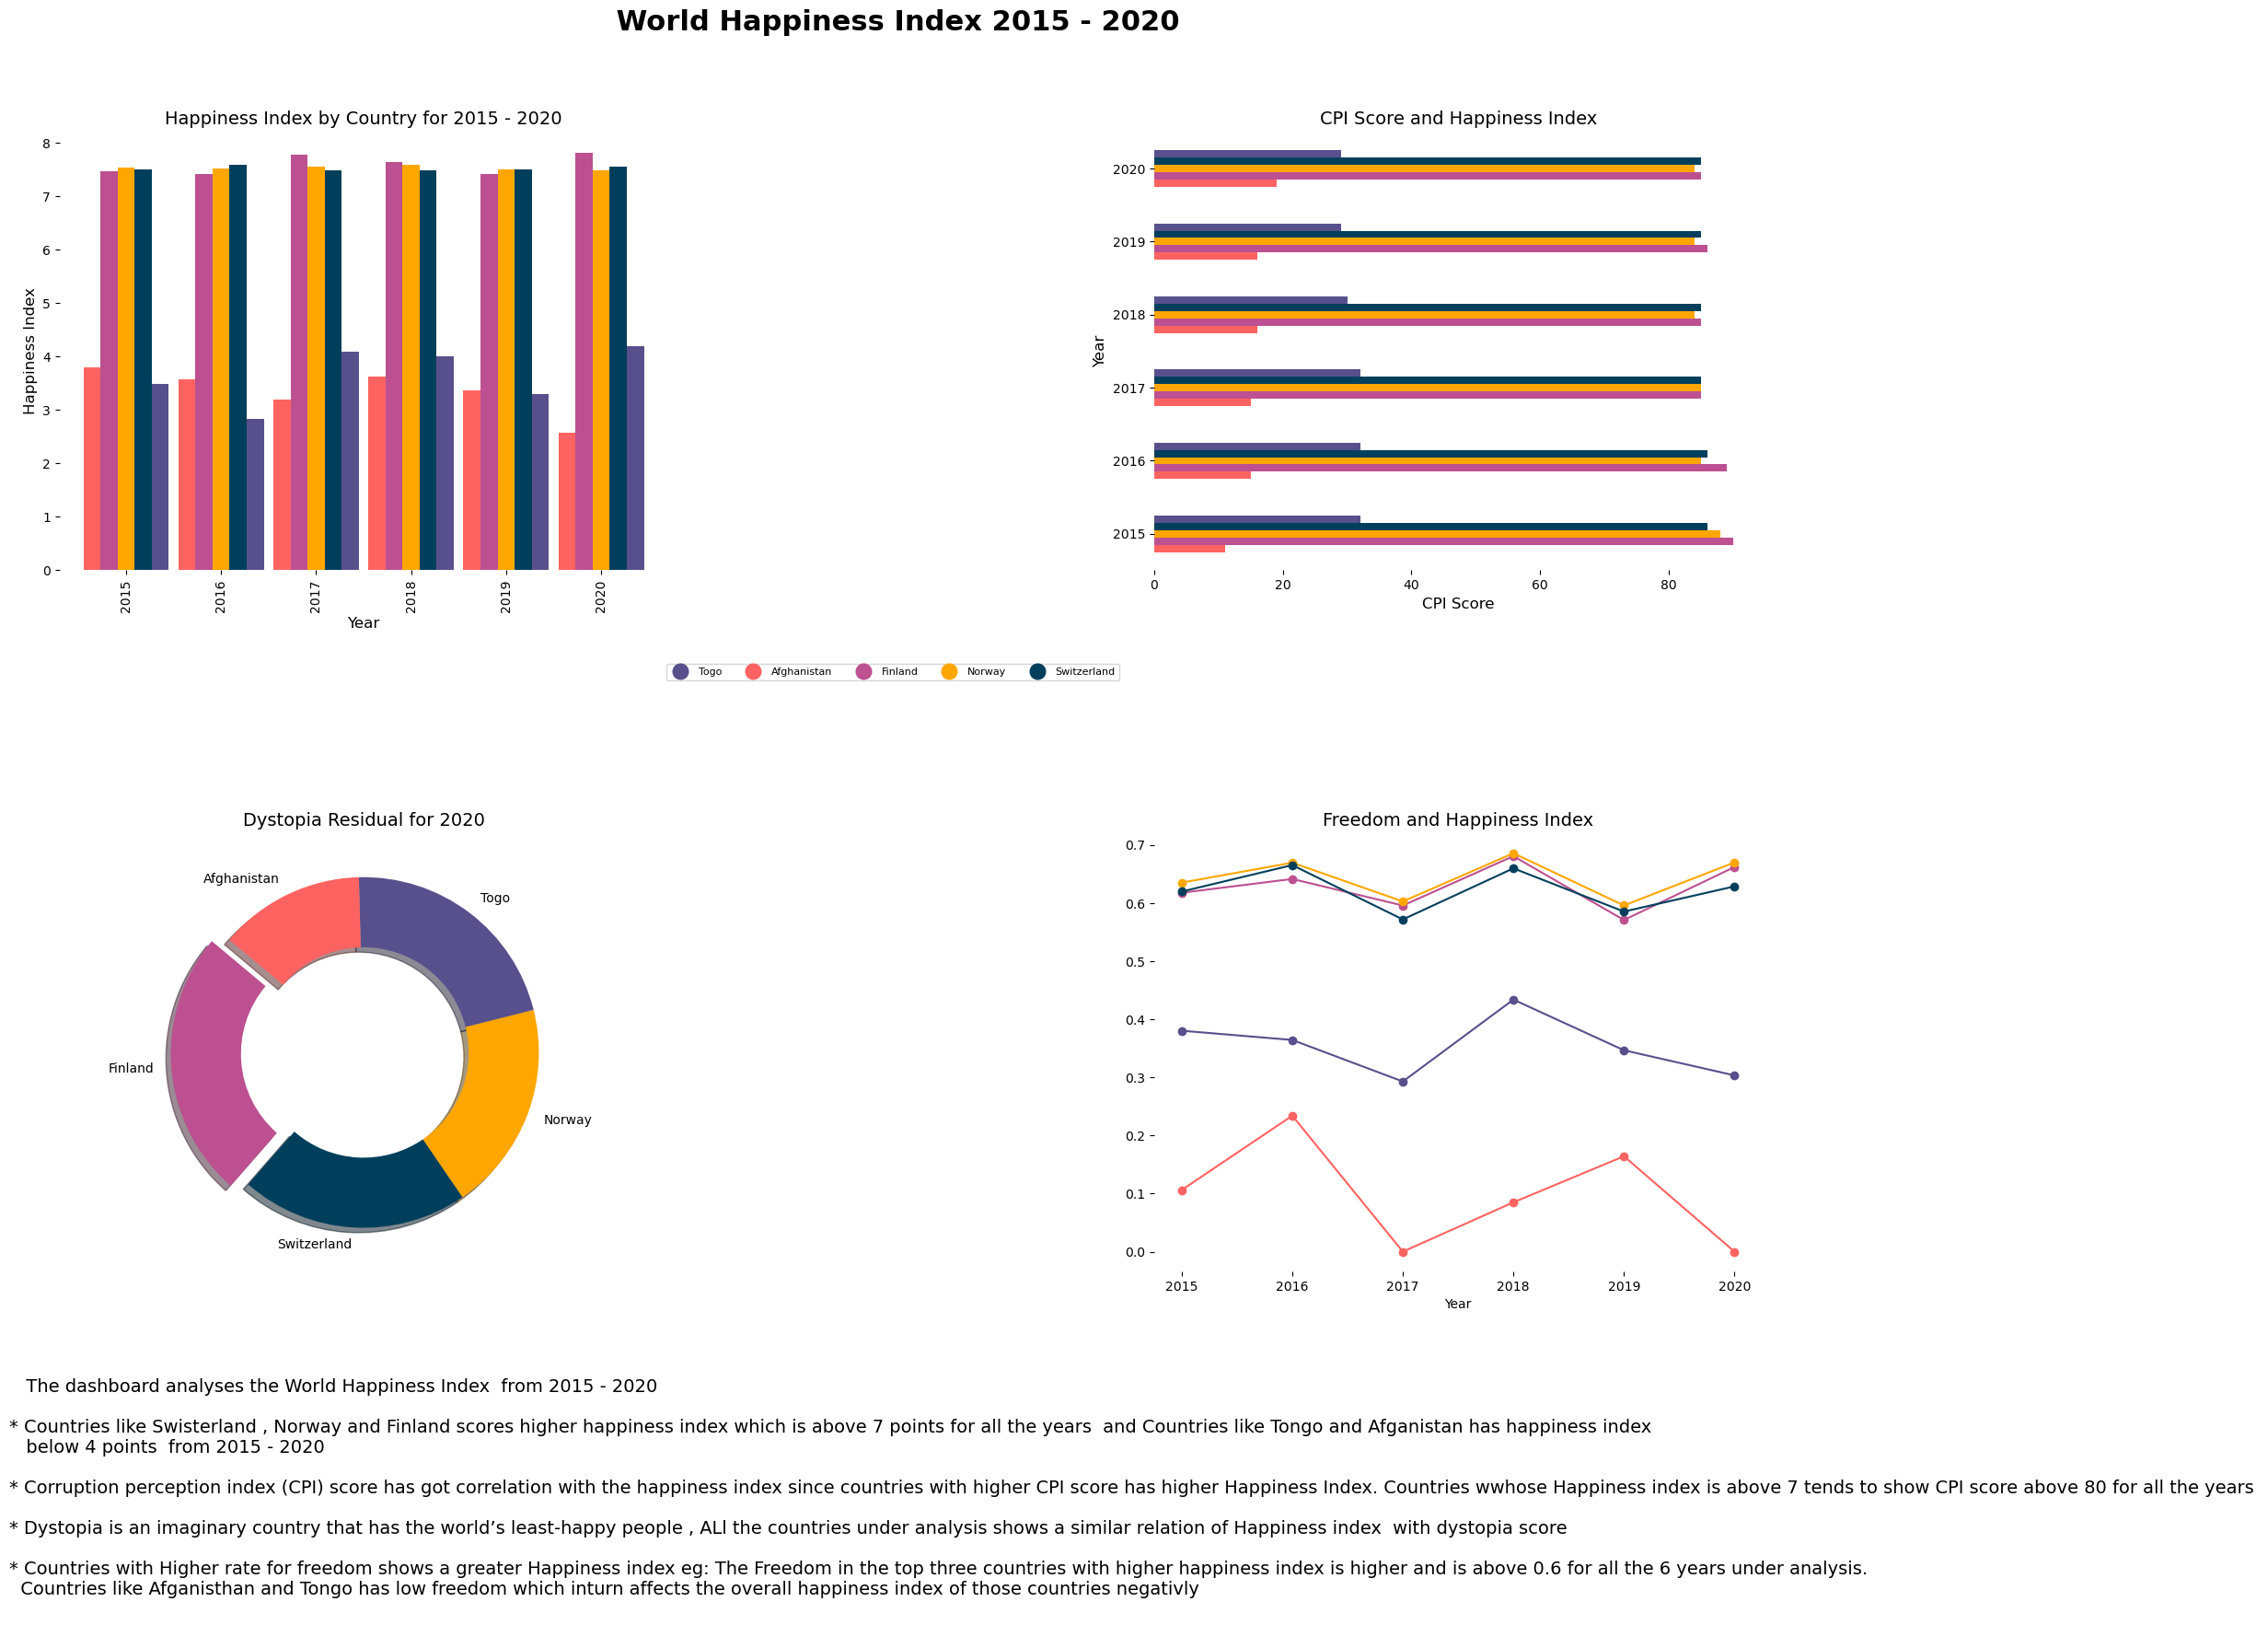

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path to original dataset
dataset_Path = "WorldHappiness_Corruption_2015_2020.csv"

# Selected countries for analysis
COUNTRY_NAMES = [
    "Togo", "Afghanistan", "Finland", "Norway", "Switzerland",
]

ColorMap = {
    "Togo": "#58508d",
    "Afghanistan": "#ff6361",
    "Finland": "#bc5090",
    "Norway": "#ffa600",
    "Switzerland": "#003f5c"
}

YEARS = [2018, 2019, 2020]
year = 2020
width = 0.10

# Function to read dataset
def readDataSet(path):
    df = pd.read_csv(path)
    cleaned_df = df.dropna()
    return cleaned_df


cleaned_df = readDataSet(dataset_Path)
df_filtered = cleaned_df[cleaned_df['Country'].isin(COUNTRY_NAMES)]
filetred_df_Hindex = df_filtered[["Country", "happiness_score", "Year"]]
pivot_df_Hindex = filetred_df_Hindex.pivot(
    index='Year', columns='Country', values='happiness_score')
df_filtered_CPI = df_filtered[["Country", "cpi_score", "Year"]]
pivot_df_CPI = df_filtered_CPI.pivot(
    index='Year', columns='Country', values='cpi_score')
df_filtered_dystopia = df_filtered[df_filtered['Year'] == 2020][[
    "Country", "dystopia_residual"]]
df_filtered_Freedom = df_filtered[["Country", "freedom", "Year"]]
pivot_df_Freedom = df_filtered_Freedom.pivot(
    index='Year', columns='Country', values='freedom')




# Function to get color for country
def get_country_color(country):
    return ColorMap.get(country, '#000000')  # Default to black if not found

# Creating a figure and axes using plt.subplots()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
# fig.set_facecolor('#fceee9')
fig.suptitle(" World Happiness Index 2015 - 2020", fontsize=22,fontweight='bold')



for ax in axes.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


# Create a single legend
handles = [plt.Line2D([0], [0], color=get_country_color(country), marker='o',
                      markersize=10, linestyle='', label=country) for country in COUNTRY_NAMES]

legend = fig.legend(handles=handles, labels=COUNTRY_NAMES, loc='center', ncol=5,
                    fontsize=10, bbox_to_anchor=(0.5, 0.5), bbox_transform=fig.transFigure)

frame = legend.get_frame()
frame.set_facecolor('#F9F9F9')  # Legend background color
frame.set_edgecolor('black')   # Legend border color

plt.setp(legend.get_title(), fontsize='12')  # Legend title font size
plt.setp(legend.get_texts(), color='black')
# Second subplot: Happiness Index Bar Graph
pivot_df_Hindex.plot(kind='bar', width=0.9, ax=axes[0, 0], color=[
                     get_country_color(country) for country in pivot_df_Hindex.columns])
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Happiness Index', fontsize=12)
axes[0, 0].set_title('Happiness Index by Country for 2015 - 2020', fontsize=14)
axes[0, 0].legend().remove()  # Remove individual legend

# Third subplot: CPI Score Horizontal Bar Graph
pivot_df_CPI.plot(kind="barh", ax=axes[0, 1], color=[
                  get_country_color(country) for country in pivot_df_CPI.columns])
axes[0, 1].set_xlabel('CPI Score', fontsize=12)
axes[0, 1].set_ylabel('Year', fontsize=12)
axes[0, 1].set_title('CPI Score and Happiness Index', fontsize=14)
axes[0, 1].legend().remove()  # Remove individual legend

# Fourth subplot: Dystopia Residual Pie Chart
explode = [0.1 if i == 0 else 0 for i in range(len(df_filtered_dystopia["Country"]))]

axes[1, 0].pie(
    df_filtered_dystopia["dystopia_residual"],
    labels=df_filtered_dystopia["Country"],
    startangle=140,
    colors=[get_country_color(country)
            for country in df_filtered_dystopia["Country"]],
    explode=explode,
    shadow=True,
    wedgeprops={'width': 0.4},  # Set the width to create a donut chart
)
axes[1, 0].set_title('Dystopia Residual for 2020', fontsize=14)
axes[1, 0].legend().remove()  # Remove individual legend

# Fifth subplot: Freedom Line Plot
axes[1, 1].set_title('Freedom and Happiness Index', fontsize=14)
pivot_df_Freedom.plot(kind="line", ax=axes[1, 1], marker='o',color=[
                      get_country_color(country) for country in pivot_df_Freedom.columns])
axes[1, 1].legend().remove()  # Remove individual legend

# Adjust layout and save the figure
plt.tight_layout(pad=4.0, h_pad=6.0, w_pad=2.0)
fig.subplots_adjust(wspace=0.8, hspace=0.6)

# Save the plot
plt.savefig('combined_plots.png', dpi=300,
            bbox_extra_artists=(legend,), bbox_inches='tight')

# Show the plots


description_text = """   The dashboard analyses the World Happiness Index  from 2015 - 2020

* Countries like Swisterland , Norway and Finland scores higher happiness index which is above 7 points for all the years  and Countries like Tongo and Afganistan has happiness index
   below 4 points  from 2015 - 2020
    
* Corruption perception index (CPI) score has got correlation with the happiness index since countries with higher CPI score has higher Happiness Index. Countries wwhose Happiness index is above 7 tends to show CPI score above 80 for all the years 
  
* Dystopia is an imaginary country that has the world’s least-happy people , ALl the countries under analysis shows a similar relation of Happiness index  with dystopia score 

* Countries with Higher rate for freedom shows a greater Happiness index eg: The Freedom in the top three countries with higher happiness index is higher and is above 0.6 for all the 6 years under analysis. 
  Countries like Afganisthan and Tongo has low freedom which inturn affects the overall happiness index of those countries negativly

"""

fig.text(0.02, -0.2, description_text, ha='left', va='bottom', fontsize=14,
)

plt.show()

In [ ]:
# 